<a href="https://colab.research.google.com/github/Namil27/MVD/blob/main/labs/%D0%9B%D0%A03_%D0%9E%D0%B1%D0%B5%D1%81%D0%BF%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


**Цель работы:** исследование и обработка данных для повышения их качества.

**Краткое описание:** в лабораторной работе приводится поэтапный план изучения и обработки намеренно не предобработанных данных. Необходимо выполнить все этапы плана и оценить результаты преобразований.

# Данные



В папке [Data/lab3](https://drive.google.com/drive/folders/1437z7m5Ut4WUJOhJg1oZz13dtBpxgFKs?usp=share_link) расположена таблица `monster_com_job_sample.com` с данными о вакансиях. Также эти данные с описанием и примерами обработки можно найти на [kaggle](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data#).

##### **Формат данных**

```
country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
United States of America,US,"",No,jobs.monster.com,"TeamSoft is seeing an IT Support Specialist to join our client in Madison, WI. The ideal candidate must have at least 6 years of experience in the field. They need to be familiar with a variety of the field's concepts, practices, and procedures as this position relies on extensive experience and judgment to plan and accomplish goals. Required Skills:вАҐ Call tracking softwareвАҐ Phone based technical supportвАҐ Problem documentation and communicationвАҐ Remote Desktop Management ToolsвАҐ Respond to customer requestsвАҐ General understanding of LANDeskвАҐ Microsoft Office 2007 SuiteFind out why TeamSoft is the Madison area's technology leader with over 200 IT consultants. Owned, operated, and managed by IT consultants, TeamSoft is the clear choice for your career. Join the TeamSoft family today!Did you know?вАҐ TeamSoft offers salaried options for many positions that include 5 weeks PTO and great benefits!вАҐ TeamSoft has been in business since 1996вАҐ TeamSoft's owners are local IT professionals who possess a wealth of experience in application development, business analysis, and project managementвАҐ TeamSoft's Recruiters are knowledgeable, friendly, and ready to help you make your next great career moveвАҐ TeamSoft offers a full benefits suite to all of our W2 consultants, including a 401k plan with a 100% vested 4% dollar for dollar matchвАҐ Our targeted selection process is designed to get to know your strengths and career interests and provide you with the best chance for success in your new positionвАҐ Our longest running consultant has been with us for 16 yearsвАҐ Consultants can participate in our charitable giving committee. To date, TeamSoft's charitable giving committee has donated over $100,000!TeamSoft is owned by local IT professionals. Our team also has deep experience with IT staffing. Our clients understand this and rely on our expertise. That is why TeamSoft is the Madison Area's largest privately owned IT consulting firm, with more than 200 current consultants! With over 50 active clients, TeamSoft will give you the greatest exposure to the widest range of IT careers.Our owners possess a combined 60+ years of IT consulting experience. Our recruiting and Account Management staff are very well-versed in our client markets. We get you. We know you. We know what you do every day. And we know what you deal with on the job.You take your career seriously and so do we. At TeamSoft you are not just a resume or number. Our goal is to create long-term partnerships with each of our consultants, and according to feedback from many of them, we are very good at this. Click HERE to see what our consultants have to say about working with TeamSoft.TeamSoft -- Promote yourself!TeamSoft is an equal employment opportunity employer functioning under an Affirmative Action Plan.",IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702","",http://jobview.monster.com/it-support-technician-job-madison-wi-us-167855963.aspx?mescoid=1500134001001&jobPosition=20,"",IT/Software Development,11d599f229a80023d2f40e7c52cd941e
United States of America,US,"",No,jobs.monster.com,"The Wisconsin State Journal is seeking a flexible and motivated reporter/editor to lead its three-person business desk. WeвАЩre looking for an experienced journalist able to spot trends, be a watchdog and reflect the Madison areaвАЩs vibrant entrepreneurial community. This is a hybrid reporting and editing position that calls for a fleet-footed, multimedia storyteller able to maximize the newspaperвАЩs online presentation while also editing two sections a week. Candidates must have strong news judgment, be well versed in business news and trends and be able to quickly prioritize coverage.At least five yearsвАЩ experience reporting or editing for digital and print platforms desired. To be considered for the position, applicants must apply online.¬†As part of your online application, please attach five samples of your work or links to five recent stories.Wisconsin State Journal, 1901 Fish Hatchery Road, Madison, WI 53713Affirmative Action/Equal Opportunity Employer/Pre-employment drug testing appliesPI94338362Apply Here",Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-editor-job-madison-wi-us-167830105.aspx?mescoid=2700437001001&jobPosition=7,"","",e4cbb126dabf22159aff90223243ff2a
...
```

##### **Описание полей**
 - ```country``` — наименование страны;
 - ```country_code``` — код страны;
 - ```date_added``` — дата размещения вакансии;
 - ```has_expired``` — актуальность вакансии;
 - ```job_board``` — агрегатор вакансий, с которого собраны данные;
 - ```job_description``` — описание вакансии;
 - ```job_title``` — наименование должности;
 - ```job_type``` — вид занятости;
 - ```location``` — метоположение организации;
 - ```organization``` — наименование организации;
 - ```page_url``` — ссылка на страницу с вакансией;
 - ```salary``` — заработная плата;
 - ```sector``` — сфера деятельности;
 - ```uniq_id``` — уникальный идентификатор записи о вакансии.

# Понимание данных

In [ ]:
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns

В датасете есть несколько столбцов, в каждой ячейке которых записано одно и то же значение. Есть столбцы, в которых формат записи значений не стандартизирован. А есть такие, где указана информация, не соответствующая названию столбца.

**Первый этап изучения данных** – понять, какие основные проблемы предстоит решить для каждого из столбцов. Для этого загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

csv_file = pd.read_csv("monster_com_job_sample.csv")
print(csv_file.sample(10))

**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.


Название столбца | Тип данных | Проблемы
--- | --- | ---
```country``` | str | все норм
```country_code``` | str | все норм
```date_added``` | NaN | пустые значения
```has_expired``` | str | все норм
```job_board``` | str | все норм
```job_description``` | str |  ошибки при заполенинии (например Position ID#  60176 # Positions  1 State  CA C...)
```job_title``` | str | все норм
```job_type``` | str | не стандартизированы значения (где то  Full Time, а дле то Full Time Employee), а где-то и вовсе NaN
```location``` | str | где-то Durham, NC 27713, а где-то Camphill, PA.
```organization``` | str | есть NaN
```page_url``` | str | все норм
```salary``` | NaN or str | есть NaN
```sector``` | Nan or str | есть NaN
```uniq_id``` | str | все норм

### Оценка пустых ячеек в датасете

Выясните, в каких столбцах, строках и в каком количестве отсутствуют данные:
1. С помощью модуля `pandas` составьте таблицу, где каждому названию столбца будет сопоставлено общее количество ячеек и количество пустых ячеек.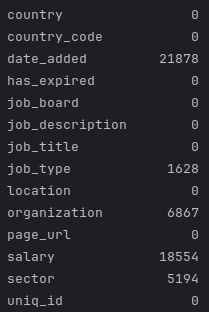
2. Подсчитайте количество строк датасета, в которых пустыми являются более 75% ячеек.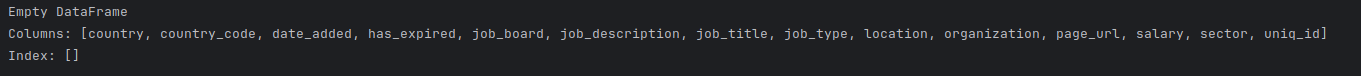
3. Визуализируйте число пропусков в датасете с помощью модуля, построив столбчатую диаграмму. Для удобства можно воспользоваться модулем `missingno`.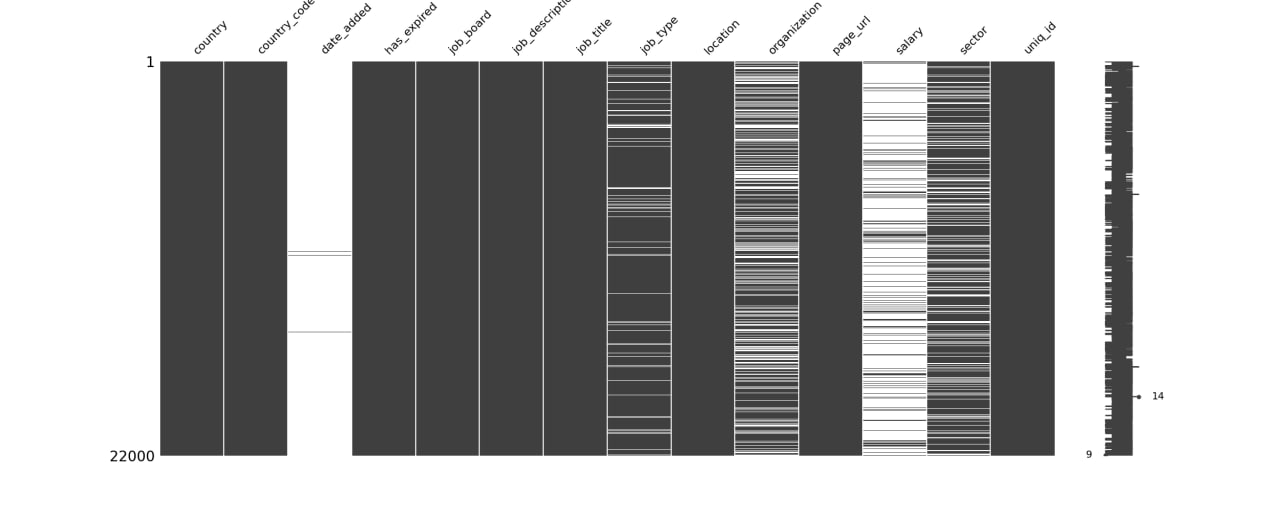


In [ ]:
# Пустые значения столбцов датасета.
csv_file = pd.read_csv("monster_com_job_sample.csv")
print(csv_file.isna().sum())

# Количество строк с пропуском больше 75 (Всего 22000)
csv_file = csv_file.replace('', pd.NA)

missing_rows = csv_file.isna().mean(axis=1)
print(csv_file[missing_rows > 0.75])

# График пропусков.
msno.matrix(csv_file)
plt.savefig("plot.png")

Проверьте, как изменится размер датасета, если принять решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [ ]:
# PUT YOUR CODE HERE

### Первичная оценка данных в столбцах

Изучите данные в столбцах датасета, ответив на следующие вопросы:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли такие значения, которые встречаются более чем в одном столбце?
3. Есть ли столбцы, данные в которых не соответствуют названию столбца?

In [ ]:
# PUT YOUR CODE HERE

### Дублирование данных

Для поиска дублирующихся строк выполните следующие действия:
1. В таблице есть столбец `uniq_id`, значения которого, как сказано в описании данных, являются уникальными идентификаторами записей. Проверьте, действительно ли в этом столбце все значения различны.
2. Проверьте, есть ли в таблице другие столбцы, значения которых в каждой строке различны.
3. Если игнорировать столбцы, где все значения различны, найдутся ли такие строки, для которых значения по всем остальным столбцам будут совпадать?

Оцените результаты поиска дубликатов.

In [ ]:
# PUT YOUR CODE HERE

# Практические задания

В этом разделе необходимо обработать значения в трех столбцах датасета: `location`, `salary` и `job_type`. Цель обработки – стандартизировать данные в каждом из столбцов так, чтобы их можно было анализировать.

### Задание 1

В задании 1 необходимо провести обработку столбца `location`.

#### Задание 1.1

В столбце `location` представлена информация о местоположении организации, в которой открыта вакансия. Каждое значение столбца `location` содержит информацию о городе, коде штата и почтовом индексе.

Однако не в каждой строке есть все три характеристики местоположения, а также могут встречаться разные комбинации из них, записанные в виде строки в произвольном порядке и с разными разделителями.

Например, может быть указан только код штата, только название города или только индекс. Могут быть указаны любые две характеристики из трех.

**Формулировка задания:**
1. Определите, какие форматы встречаются.
2. Напишите одно или несколько регулярных выражений для поиска выявленных форматов.
3. Визуализируйте количество найденных форматов на столбчатой или круговой диаграмме. Также покажите на ней количество строк, в которых формат определить не удалось. Какие форматы встречаются чаще всего?

Ознакомиться с теоретическим материалом по работе с регулярными выражениями можно [по ссылке](https://colab.research.google.com/drive/1eFHdmt9OROLEDJRNc2wNmz0gpE1O3sKU?usp=sharing).

In [ ]:
# PUT YOUR CODE HERE

#### Задание 1.2

В большей части строк удалось извлечь данные из ячейки столбца `location`, но остались и такие, где это не получилось. Вынесите в отдельный датасет записи, в которых не удалось определить формат записи информации о местоположении.

Над оставшимися строками проведите следующие преобразования:
1. Данные о местоположении разделите на 3 столбца: город, код штата, почтовый индекс.
2. Так как значения в столбце `почтовый индекс` являются пятизначными числами, преобразуйте их в целочисленный формат.

In [ ]:
# PUT YOUR CODE HERE

Рассмотрите отложенную часть выборки (ту, где не удалось данные из столбца `location` разделить на три поля) и сделайте выводы о возможности извлечь из данных город, код штата и почтовый индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

In [ ]:
# PUT YOUR CODE HERE

### Задание 2

В задании 2 необходимо провести обработку столбца `salary`.

#### Задание 2.1

В столбце `salary`, как и в `location`, данные не стандатизированы. В нем в основном можно встретить записи в следующих форматах:

* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

Основные проблемы, которые стоит учесть при обработке форматов:
- В каждом из форматов может быть или не быть знака доллара.
- Может отсутствовать информация о периоде, за который указывается зарплата (`/hour` или `/year` в примерах).
- Зарплата может быть указана за месяц (`/month`) и за неделю (`/week`).
- В начале, конце и середине некоторых строк есть лишние пробелы, которые не стоит учитывать.

**Задание:**
1. Определите весь перечень встречающихся форматов и напишите одно или несколько регулярных выражений для их поиска.
2. Покажите на столбчатой диаграмме количество записей, содержащих каждый из форматов. Сделайте выводы.

In [ ]:
# PUT YOUR CODE HERE

#### Задание 2.2

1. Разделите столбец `salary` зарплаты три: `минимальная граница зарплаты`, `максимальная граница зарплаты`, `период`. Если значение суммы указано только одно, считайте, что это минимальная зарплата. Значение суммы в обоих столбцах преобразуйте в формат `float`.
2. Покажите на столбчатой диаграмме с группировкой среднюю и медианную минимальную зарплату в каждом периоде. Сделайте выводы.

In [ ]:
# PUT YOUR CODE HERE

#### Задание 2.3

Как было отмечено в задании 2.1, период, за который указывается зарплата, может отсутствовать. Восполните этот пробел в данных следующим образом:

1. Определите диапазон изменения (разброс) значений денежной суммы за каждый из встречающихся в данных периодов. Постройте гистограмму для каждого периода.
2. Определите, к среднему значению за какой период ближе всего сумма, у которой период не указан. Укажите для найденный период. В спорных случаях, где сумма одинаково близка к нескольким диапазонам, не выбирайте ничего.

In [ ]:
# PUT YOUR CODE HERE

### Задание 3

В задании 3 необходимо провести обработку столбца `job_type`. Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
# PUT YOUR CODE HERE

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [ ]:
# PUT YOUR CODE HERE

Столбец `job_type` состоит из двух частей: "полнота" занятости (`Full Time`, `Part Time`, `Per Diem`) и "тип" занятости (`Employee`, `Intern`). Кроме того, встречаются и неполные записи.

Задание:
1. Написать одно или несколько регулярных выражений для разделения столбца `job_type` на два: `полнота занятости`, `тип занятости`.
2. Если данные о полноте отсутствуют, внесите значение `Full Time`.
Если отсутствуют данные о типе – внесите `Employee`.
3. Постройте столбчатую диаграмму со стековой группировкой для полноты и типа занятости. Сделайте выводы.

In [ ]:
# PUT YOUR CODE HERE

# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения всех заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой решение задачи на обработку данных лабораторной работы, меньшее по объему, но сопоставимое по сложности тем заданиям, которые требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. В столбце `sector` часто представлены данные из столбца `organization` и наоборот. Устраните эту проблему.
2. В столбце `job_title` часто можно частично или полностью встретить указание местоположения организации. Сравните, совпадают ли в таких случаях данные с тем, что указано в столбцах `город`, `код штата`, `почтовый индекс`. Если в этих трех столбцах данные отсутствуют, заполните их данными из столбца `job_title`.
3. Практически во всех столбцах датасета вместо соответствующих названию данных иногда встречается текст из `job_description`. Найдите такие столбцы и записи с описанием вакансии в них. Покажите на столбчатой диаграмме, в каких столбцах и в каком количестве находится информация из столбца `job_description`.

# Дополнительные материалы

1. DAMA-DMBOK: Свод знаний по управлению данными: Второе издание / DAMA International; [пер. с англ.]. – Москва: ООО "Олимп-Бизнес", 2021. – 828 с.
2. Макгрегор, С. Обработка данных на Python: Data Wrangling и Data Quality: [Текст] / С. Макгрегор. – Москва: БХВ, 2024. – 432 с.